In [11]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.optimize import fsolve
import numpy as np

## Acoustic Phonon Equations

def fermi_int(j,eta):
    F = integrate.quad(lambda eps: (eps**j)/(1+np.exp(eps-eta)), 0, np.inf)
    return(F[0])

def Seebeck(eta):
    e=1.60217662*10**(-19);#C
    k=1.381*10**(-23); #J/K
    alpha=(k/e)*(2*fermi_int(1,eta)/fermi_int(0,eta)-eta);
    return(alpha)

def n_carrier(meff,T,eta):
    h=6.626*10**(-34); #J/s
    k=1.381*10**(-23); #J/K
    n=4*np.pi*((2*meff*k*T/h**2)**(3/2))*fermi_int(.5,eta);
    return(n)

In [12]:
## variable scattering equations

e=1.60217662*10**(-19);#C
k=1.381*10**(-23); #J/K
ke = 8.617333262145*10**(-5);# eV/K
h=6.626*10**(-34); #Js
me = 9.1093837*10**(-31); #kg
hbar = 1.054571817 **(-34) #Js

def sigma_e(T,r,eps,wmob):
    sigma_e = (e*((2*me*k*T)**(3/2))/(3*(np.pi**2)*(hbar**3)))*wmob*(eps**(r+(3/2)))
    return(sigma_e)

def fermi_func(eps,eta):
    F = 1/(1+np.exp(eps-eta))
    return(F)
    
def fermi_deriv(eps,eta,T):
    dfde = (fermi_func(eps,eta)*(1-fermi_func(eps,eta)))/(k*T)
    return(dfde)
    
def Seeb_Scat(eta,r):
    wmob = 1 # this gets divided out so it doesn't matter for seebeck
    T = 300 # this also doesn't impact Seebeck so I'm just going to choose a value
    numerator = integrate.quad(lambda eps: (sigma_e(T,r,eps,wmob)*fermi_deriv(eps,eta,T)*(eps-eta)), 0, np.inf)
    denominator = integrate.quad(lambda eps: (sigma_e(T,r,eps,wmob)*fermi_deriv(eps,eta,T)), 0, np.inf )
    Seebeck = (k/e)*(numerator[0]/denominator[0])
    print(numerator)
    print(denominator)
    return(Seebeck)


In [ ]:
## variable scattering equations
## chaning the way we're solving for things

e=1.60217662*10**(-19);#C
k=1.381*10**(-23); #J/K
ke = 8.617333262145*10**(-5);# eV/K
h=6.626*10**(-34); #Js
me = 9.1093837*10**(-31); #kg
hbar = 1.054571817 **(-34) #Js

def sigma_e_E(T,r,eps,wmob):
    sigma_e = (e*((2*me*k*T)**(3/2))/(3*(np.pi**2)*(hbar**3)))*wmob*(eps**(r+(3/2)))
    return(sigma_e)

def fermi_func_E(eps,eta):
    F = 1/(1+np.exp(eps-eta))
    return(F)
    
def fermi_deriv_E(eps,eta,T):
    dfde = (fermi_func(eps,eta)*(1-fermi_func(eps,eta)))/(k*T)
    return(dfde)
    
def Seeb_Scat_E(eta,r):
    wmob = 1 # this gets divided out so it doesn't matter for seebeck
    T = 300 # this also doesn't impact Seebeck so I'm just going to choose a value
    numerator = integrate.quad(lambda eps: (sigma_e(T,r,eps,wmob)*fermi_deriv(eps,eta,T)*(eps-eta)), 0, np.inf)
    denominator = integrate.quad(lambda eps: (sigma_e(T,r,eps,wmob)*fermi_deriv(eps,eta,T)), 0, np.inf )
    Seebeck = (k/e)*(numerator[0]/denominator[0])
    print(numerator)
    print(denominator)
    return(Seebeck)


In [13]:
cc_values = np.logspace(23,28,5)
temperatures = np.linspace(100,1000,91)

In [14]:
data = np.zeros((len(cc_values),len(temperatures),5))

In [15]:
me = 9.1093837*10**(-31); #kg
i1 = 0
for n in cc_values:
    i2 = 0
    for T in temperatures:
        def func(x):
            f = n_carrier(me,T,x)*10**(-20) - n*10**(-20)
            return(f)
        eta_loop = fsolve(func,0)
        alpha_iis = Seeb_Scat(eta_loop,1.5)
        alpha_aps = Seeb_Scat(eta_loop,-.5)
        data[i1,i2,0] = T
        data[i1,i2,1] = n
        data[i1,i2,2] = eta_loop
        data[i1,i2,3] = alpha_iis
        data[i1,i2,4] = alpha_aps
        i2 = i2+1
    i1 = i1 + 1

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_14942/3941153668.py:9: RuntimeWarning: overflow encountered in exp
  F = integrate.quad(lambda eps: (eps**j)/(1+np.exp(eps-eta)), 0, np.inf)


(1.9008892445339024e-73, 1.5991661312838362e-73)
(2.413585252703585e-74, 1.8194517559277256e-74)
(2.3471825417185956e-74, 9.835906310079422e-75)
(3.9912842074793086e-75, 2.4832337250252044e-76)
(1.6765756271036516e-73, 1.4060438958046916e-73)
(2.090743872813351e-74, 1.5756345783627158e-74)
(2.0846571840346486e-74, 8.659794689744385e-75)
(3.4609694934420667e-75, 2.1502619405719015e-76)
(1.494674683430898e-73, 1.2500549085081822e-73)
(1.834005882705684e-74, 1.381838404719234e-74)
(1.8697260783561126e-74, 7.583809729412061e-75)
(3.038461220551571e-75, 1.8856189045785594e-76)
(1.3445847987322567e-73, 1.1217902029870724e-73)
(1.6258526870641223e-74, 1.2247799625587507e-74)
(1.6909142853725222e-74, 6.714072619406747e-75)
(2.6954000296745123e-75, 1.6711785165087453e-76)
(1.2189116042974507e-73, 1.0147204236535713e-73)
(1.4543156348245697e-74, 1.0953927181162244e-74)
(1.5401079467410098e-74, 5.999141106711729e-75)
(2.41234375464629e-75, 1.4945424759508648e-76)
(1.1123509011343053e-73, 9.241826

(1.7274730819450874e-74, 1.3915415883225948e-74)
(1.6350260220125423e-75, 1.2300978890201156e-75)
(2.3327327543728e-75, 6.734275348591378e-76)
(2.7233767375054927e-76, 1.6775581233585005e-77)
(1.6891106653010067e-74, 1.3602404399606233e-74)
(1.5949731240131692e-75, 1.1999601653948212e-75)
(2.282203359489105e-75, 6.57020709400983e-76)
(2.6566970832876784e-76, 1.6364551389984618e-77)
(1.6521948713452856e-74, 1.3301302595476063e-74)
(1.556529307978104e-75, 1.1710333938153538e-75)
(2.233545323700743e-75, 6.412724432341068e-76)
(2.5926945908547695e-76, 1.5970038091950926e-77)
(1.6166493283129594e-74, 1.3011477239165336e-74)
(1.5196055012893258e-75, 1.1432505281208166e-75)
(2.1866612956314279e-75, 6.261462536799798e-76)
(2.5312211632358895e-76, 1.5591126807222677e-77)
(1.582402815118207e-74, 1.273233806214442e-74)
(1.4841188723328814e-75, 1.1165492207912944e-75)
(2.141460406544665e-75, 6.116082180876982e-76)
(2.4721390724314876e-76, 1.5226967099836448e-77)
(1.5493888407248706e-74, 1.24633342

(1.0739625341055819e-72, 9.646761265628037e-73)
(1.8345174648311027e-73, 2.3092823253686912e-73)
(1.1259128559407416e-73, 5.132836770849804e-74)
(2.8845686251027044e-74, 1.9142883503477492e-75)
(1.0015321538838755e-72, 8.96152668199883e-73)
(1.6871351724254947e-73, 2.1356993507023742e-73)
(1.061075710480673e-73, 4.793148157386146e-74)
(2.6642572581191997e-74, 1.7584233259128065e-75)
(9.373354956100907e-73, 8.357583978653885e-73)
(1.5553911241508256e-73, 1.1856961883956517e-73)
(1.0025668067344436e-73, 4.491380818617507e-74)
(2.4705431596688537e-74, 1.622725072361187e-75)
(8.800859096605046e-73, 7.821747721714874e-73)
(1.442658849290487e-73, 1.0987346670834757e-73)
(9.495372154985843e-74, 4.221725689820422e-74)
(2.2991487992787412e-74, 1.5037101294961626e-75)
(8.287480463179131e-73, 7.343494877337986e-73)
(1.342967670608429e-73, 1.0219628052884072e-73)
(9.012800857160666e-74, 3.9866215419598866e-74)
(2.146640610843221e-74, 1.398508734361594e-75)
(7.824797781313577e-73, 6.914330760548741

(2.1069938788050528e-73, 1.7773087882256903e-73)
(2.7158563472653727e-74, 2.047858284824547e-74)
(2.5860890892303834e-74, 1.0850203039809271e-74)
(4.486825030836345e-75, 2.7951962655994966e-76)
(2.0638298104687666e-73, 1.7399473994092948e-73)
(2.6521246520372545e-74, 1.999690398531629e-74)
(2.536232001774503e-74, 1.0638355459622898e-74)
(4.3824227761465763e-75, 2.7294034222738305e-76)
(2.0221859443244415e-73, 1.7039283488151123e-73)
(2.59084950383818e-74, 1.953384189689133e-74)
(2.4880430747608186e-74, 1.0433683708245588e-74)
(4.2820049596072956e-75, 2.6661555241136193e-76)
(1.9819868154764427e-73, 1.6691838503029326e-73)
(2.5319002509672814e-74, 1.9088403464603268e-74)
(2.441443320626044e-74, 1.0235843794364643e-74)
(4.1853620048043745e-75, 2.6053166904557202e-76)
(1.943161766642602e-73, 1.635650503231432e-73)
(2.4751550478304636e-74, 1.865966272511755e-74)
(2.396358561369159e-74, 1.0044512934508783e-74)
(4.0922982921181055e-75, 2.54676023743952e-76)
(1.9056445760164292e-73, 1.6032689

(1.172199230329953e-71, 3.874361608017033e-72)
(3.7926599850776404e-72, 3.3841482082148883e-72)
(4.964193928256145e-73, 5.446369252268639e-73)
(3.298338620027333e-73, 5.662333918053011e-75)
(1.0930174558547342e-71, 3.8928276133766636e-72)
(3.452894034966727e-72, 2.1236882069675507e-72)
(4.852679560607054e-73, 5.0895592257590966e-73)
(3.113157020331036e-73, 1.0369882469931295e-74)
(1.0229703961447064e-71, 3.955224027782621e-72)
(3.160198856343968e-72, 1.4905836076047478e-72)
(4.7434765190725495e-73, 4.766450968956903e-73)
(2.9446523849070105e-73, 1.3877474601153896e-74)
(9.606246918338958e-72, 4.034491467479063e-72)
(2.9060978354323523e-72, 1.1672133557277425e-72)
(4.6367961567383016e-73, 4.5322027284606834e-73)
(2.7907732197168452e-73, 1.6227973148712555e-74)
(9.048239662375456e-72, 4.1153421233015116e-72)
(2.68394601176795e-72, 1.0023007076958265e-72)
(4.532784778411037e-73, 4.309316951955105e-73)
(2.6497869543248762e-73, 1.7579652013320159e-74)
(8.5462635264251e-72, 4.180641389068022

(2.102768475205712e-72, 1.9778642878161627e-72)
(4.154827218480973e-73, 4.747851357066744e-73)
(1.9314170759970115e-73, 1.0000725894652004e-73)
(6.130758030523217e-74, 4.40460120057218e-75)
(2.065824376554255e-72, 1.9402810126642288e-72)
(4.064993020229378e-73, 4.6640189431368344e-73)
(1.9057700008188248e-73, 9.820334439031156e-74)
(6.0121761021177446e-74, 4.3071630272112356e-75)
(2.0300296828882566e-72, 1.903947593904618e-72)
(3.978376391631138e-73, 4.582366950682549e-73)
(1.8807124547048862e-73, 9.645591951706604e-74)
(5.897342169108871e-74, 4.213274150524296e-75)
(1.995333145894064e-72, 1.868804971808969e-72)
(3.894817516157937e-73, 4.502833745903141e-73)
(1.856225624756513e-73, 9.47625060039538e-74)
(5.78609328725578e-74, 4.122757212915173e-75)
(1.9616864798002646e-72, 1.8347976783092102e-72)
(3.814166665728866e-73, 4.4253583730695e-73)
(1.8322914449466396e-73, 9.312076299327272e-74)
(5.678275474939552e-74, 4.0354459442633896e-75)
(1.9290441519511205e-72, 1.8018735716645321e-72)
(3

(6.153535155797883e-71, 2.5673724507353583e-70)
(1.4294538381278845e-70, 2.368353512374111e-70)
(-4.82624859748933e-73, 1.98024800425868e-72)
(1.7339811071934475e-72, 2.780766643572079e-72)
(6.396789627202464e-71, 2.004487326680354e-70)
(1.4414839029895962e-70, 2.3735949558915165e-70)
(-2.470586222072237e-73, 1.3311054618354515e-72)
(1.8186318415256925e-72, 2.947819427258592e-72)
(7.474433286424711e-71, 1.5661419041784573e-70)
(1.42425767906427e-70, 2.3264448294848397e-70)
(3.93060993531495e-74, 8.727352015203092e-73)
(1.8513762226040955e-72, 2.9926439253846893e-72)
(8.828748508816321e-71, 1.7708376951741443e-70)
(1.377263480344842e-70, 2.226001116376933e-70)
(3.1903238613350266e-73, 1.4720229554932994e-72)
(1.8366656754846313e-72, 2.9288348100257065e-72)
(1.0077602955469157e-70, 2.016529594168606e-70)
(1.3066272925878032e-70, 2.0933969571268945e-70)
(5.5385278576637754e-73, 1.9916047892418457e-72)
(1.785908737684956e-72, 2.8060104212632806e-72)
(1.1014318785468542e-70, 2.2057615197749

(3.0483355764211657e-71, 4.511696770085853e-71)
(1.4069811148852818e-71, 1.7235803753691983e-71)
(6.020670585933286e-73, 1.2047274511546046e-72)
(6.625195587757862e-73, 6.793319196548523e-73)
(2.9834831547417605e-71, 4.373224463954691e-71)
(1.365166058479037e-71, 1.6604208987639228e-71)
(6.00627175381652e-73, 1.1912471239365123e-72)
(6.532744570375444e-73, 6.644182681474644e-73)
(2.920941982389122e-71, 3.1698951284917597e-71)
(1.3252256033079668e-71, 1.6002291432483751e-71)
(5.991747077989536e-73, 1.177280644463688e-72)
(6.442542551581896e-73, 6.497004064727163e-73)
(2.8606019063163032e-71, 1.7737239826023444e-71)
(1.2870506323401767e-71, 1.5428454099165959e-71)
(5.977096076536432e-73, 1.162887756447473e-72)
(6.354505925641743e-73, 6.351921394086775e-73)
(2.8023589138069667e-71, 8.42481704581823e-72)
(1.2505397275735973e-71, 1.4881196116045434e-71)
(5.962318452813112e-73, 1.1481252826044855e-72)
(6.268555836107168e-73, 6.209053199472362e-73)
(2.7461148101022672e-71, 2.749093131944035e-

(1.943427354187284e-74, 3.767195689893506e-74)
(8.436372253890087e-76, 1.632907595447604e-75)
(3.2119198629320533e-78, 6.25733044622883e-78)
(1.407087009805478e-79, 2.711460537319671e-79)
(4.675098891611791e-75, 9.177036319768645e-75)
(1.9545025534312028e-76, 3.7358831430862854e-76)
(7.120736964107673e-79, 1.5281295948613437e-78)
(3.509036477380963e-80, 6.428968531604176e-80)
(1.0059401306314754e-75, 2.41271637317445e-75)
(5.779598429385905e-77, 1.058890572023425e-76)
(-7.820432889763744e-80, 5.594441183599762e-79)
(2.0235846499235028e-80, 3.707445653311285e-80)
(-4.7770999373719923e-76, 1.596915897188454e-75)
(5.057527233251012e-77, 9.265985939379922e-77)
(-9.493399544714656e-79, 1.91404776593488e-78)
(4.8433558310317055e-80, 8.873597852663504e-80)
(-2.629806488929825e-75, 5.189438270576679e-75)
(1.3707336074073082e-76, 2.5258209013281502e-76)
(-3.32360474168809e-78, 6.333039633940018e-78)
(1.6377696204797822e-79, 3.091958405689828e-79)
(-8.489667619570883e-75, 1.6154313266577752e-74)

(6.880982797715868e-69, 1.3045255616608065e-68)
(1.6835598487492055e-69, 3.1902662158702123e-69)
(8.404701165457582e-72, 1.5949442647448756e-71)
(2.0590256616430512e-72, 3.900217414622383e-72)
(5.503300721639953e-69, 1.0435622057923498e-68)
(1.2538518997462717e-69, 2.3757258523610443e-69)
(6.717976942971775e-72, 1.2759257846048258e-71)
(1.533953832381039e-72, 2.9043627874243904e-72)
(4.3950035593235957e-69, 8.336900171498374e-69)
(9.385950696558713e-70, 1.778045818464106e-69)
(5.359933684467405e-72, 1.0193763242179414e-71)
(1.1488918592996117e-72, 2.1736243043600486e-72)
(3.5092343007381007e-69, 6.660370808907271e-69)
(7.065283899452138e-70, 1.337966497147503e-69)
(4.273135204372482e-72, 8.144509961989825e-72)
(8.656452804706868e-73, 1.6355508973546364e-72)
(2.803852868208885e-69, 5.3262697457018e-69)
(5.349821152245816e-70, 1.0125072012057831e-69)
(3.405884775918091e-72, 6.513999939840777e-72)
(6.565286947955484e-73, 1.2375928949053731e-72)
(2.2429420851822215e-69, 4.266643701324553e-

In [ ]:
with open('data3.npy', 'wb') as f:
    np.save(f, data)

In [17]:
with open('data2.npy', 'rb') as f:
    a = np.load(f)

(500, 901, 5)

In [32]:
data[:,20,3]

array([8.21046682e-04, 5.72371154e-04, 3.15824677e-04, 4.57321042e-05,
       1.04797964e-03])

In [33]:
Tlow = 300

T_loc = np.argmin(abs(data[0,:,0]-Tlow))

In [34]:
T_loc

20

In [35]:
data[0,:,0]-Tlow

array([-200., -190., -180., -170., -160., -150., -140., -130., -120.,
       -110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,
        -20.,  -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,
         70.,   80.,   90.,  100.,  110.,  120.,  130.,  140.,  150.,
        160.,  170.,  180.,  190.,  200.,  210.,  220.,  230.,  240.,
        250.,  260.,  270.,  280.,  290.,  300.,  310.,  320.,  330.,
        340.,  350.,  360.,  370.,  380.,  390.,  400.,  410.,  420.,
        430.,  440.,  450.,  460.,  470.,  480.,  490.,  500.,  510.,
        520.,  530.,  540.,  550.,  560.,  570.,  580.,  590.,  600.,
        610.,  620.,  630.,  640.,  650.,  660.,  670.,  680.,  690.,
        700.])

In [41]:
data[0,:,0]

array([ 100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.,
        190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,
        280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
        370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,
        460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,
        550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,
        640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,
        730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,
        820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,
        910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.,
       1000.])

In [44]:
with open('data2.npy', 'rb') as f: data = np.load(f)

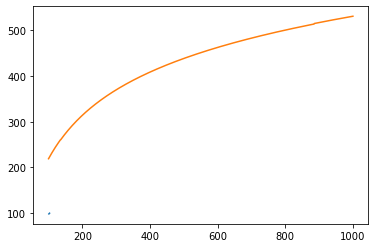

In [48]:
import matplotlib.pyplot as plt

plt.plot(data[224,1:4,0],data[224,1:4,4]*10**6)
plt.plot(data[224,:,0],data[224,:,3]*10**6)

In [64]:
Temps = data[0,:,0]
T_i = list(range(len(Temps)))

n_carriers = data[:,0,1]
n_i = list(range(len(n_carriers)))



In [63]:
for T in T_i:
    for n in n_i:
        value = 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [87]:
data[:401,0,1]

array([1.00000000e+23, 1.02334021e+23, 1.04722519e+23, 1.07166765e+23,
       1.09668060e+23, 1.12227736e+23, 1.14847155e+23, 1.17527712e+23,
       1.20270833e+23, 1.23077980e+23, 1.25950646e+23, 1.28890361e+23,
       1.31898690e+23, 1.34977233e+23, 1.38127630e+23, 1.41351558e+23,
       1.44650734e+23, 1.48026913e+23, 1.51481892e+23, 1.55017512e+23,
       1.58635653e+23, 1.62338243e+23, 1.66127252e+23, 1.70004698e+23,
       1.73972643e+23, 1.78033202e+23, 1.82188534e+23, 1.86440853e+23,
       1.90792422e+23, 1.95245558e+23, 1.99802631e+23, 2.04466067e+23,
       2.09238348e+23, 2.14122015e+23, 2.19119669e+23, 2.24233968e+23,
       2.29467637e+23, 2.34823460e+23, 2.40304289e+23, 2.45913043e+23,
       2.51652705e+23, 2.57526333e+23, 2.63537052e+23, 2.69688063e+23,
       2.75982639e+23, 2.82424133e+23, 2.89015972e+23, 2.95761666e+23,
       3.02664806e+23, 3.09729067e+23, 3.16958209e+23, 3.24356081e+23,
       3.31926620e+23, 3.39673858e+23, 3.47601918e+23, 3.55715021e+23,
      

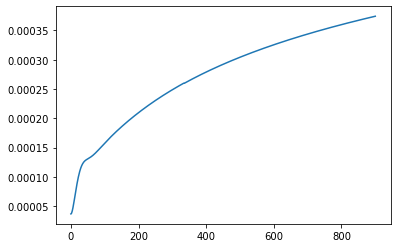

In [74]:
plt.plot(data[300,:,3])

In [78]:
data[:,175:,:]

array([[[ 2.75000000e+02,  1.00000000e+23, -5.39351016e+00,
          8.09791786e-04,  6.37483629e-04],
        [ 2.76000000e+02,  1.00000000e+23, -5.39896352e+00,
          8.10261309e-04,  6.37952621e-04],
        [ 2.77000000e+02,  1.00000000e+23, -5.40439712e+00,
          8.10729132e-04,  6.38419919e-04],
        ...,
        [ 9.98000000e+02,  1.00000000e+23, -7.32835537e+00,
          9.76482541e-04,  8.04090790e-04],
        [ 9.99000000e+02,  1.00000000e+23, -7.32985797e+00,
          9.76612037e-04,  8.04220265e-04],
        [ 1.00000000e+03,  1.00000000e+23, -7.33135907e+00,
          9.76741404e-04,  8.04349610e-04]],

       [[ 2.75000000e+02,  1.02334021e+23, -5.37040071e+00,
          8.07802147e-04,  6.35496269e-04],
        [ 2.76000000e+02,  1.02334021e+23, -5.37585428e+00,
          8.08271674e-04,  6.35965254e-04],
        [ 2.77000000e+02,  1.02334021e+23, -5.38128808e+00,
          8.08739503e-04,  6.36432545e-04],
        ...,
        [ 9.98000000e+02,  1.0233402

In [112]:
data[0,:,0]#*10**6

array([ 100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,  129.,  130.,  131.,  132.,  133.,  134.,  135.,
        136.,  137.,  138.,  139.,  140.,  141.,  142.,  143.,  144.,
        145.,  146.,  147.,  148.,  149.,  150.,  151.,  152.,  153.,
        154.,  155.,  156.,  157.,  158.,  159.,  160.,  161.,  162.,
        163.,  164.,  165.,  166.,  167.,  168.,  169.,  170.,  171.,
        172.,  173.,  174.,  175.,  176.,  177.,  178.,  179.,  180.,
        181.,  182.,  183.,  184.,  185.,  186.,  187.,  188.,  189.,
        190.,  191.,  192.,  193.,  194.,  195.,  196.,  197.,  198.,
        199.,  200.,  201.,  202.,  203.,  204.,  205.,  206.,  207.,
        208.,  209.,  210.,  211.,  212.,  213.,  214.,  215.,  216.,
        217.,  218.,  219.,  220.,  221.,  222.,  223.,  224.,  225.,
        226.,  227.,

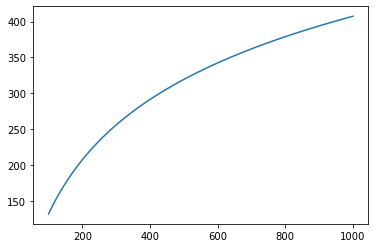

In [169]:
a = 200
plt.plot(data[a,:,0],data[a,:,4]*10**6)

In [170]:
data[a,:,2]

array([ 1.45492934,  1.42964281,  1.40474901,  1.38023702,  1.35609635,
        1.33231687,  1.30888887,  1.28580297,  1.26305017,  1.24062177,
        1.21850939,  1.19670496,  1.17520068,  1.15398905,  1.13306279,
        1.11241491,  1.09203864,  1.07192745,  1.05207501,  1.03247522,
        1.01312216,  0.99401014,  0.97513361,  0.95648722,  0.9380658 ,
        0.91986432,  0.90187792,  0.88410189,  0.86653167,  0.84916283,
        0.83199107,  0.81501223,  0.79822227,  0.78161726,  0.76519341,
        0.74894701,  0.73287447,  0.7169723 ,  0.70123712,  0.68566563,
        0.67025464,  0.65500101,  0.63990174,  0.62495387,  0.61015453,
        0.59550095,  0.58099039,  0.56662023,  0.55238789,  0.53829085,
        0.52432668,  0.510493  ,  0.4967875 ,  0.4832079 ,  0.46975202,
        0.45641769,  0.44320283,  0.43010539,  0.41712338,  0.40425485,
        0.39149791,  0.3788507 ,  0.36631141,  0.35387828,  0.34154958,
        0.32932363,  0.31719878,  0.30517343,  0.293246  ,  0.28